Introduction to Artificial Intelligence - Non-Negative Matrix Factorization
--

By Isidore Valette and Mathis Favier

IMPORTS : Let's import all the libraries that we need !

In [32]:
import tqdm
import numpy as np
import ast
import os
from matplotlib import pyplot as plt
import sklearn as sk
from time import time
import logging
import pylab as pl

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,MiniBatchDictionaryLearning,DictionaryLearning

from sklearn.decomposition import NMF
from sklearn import decomposition
from sklearn.decomposition import *

Part 1 : Digits dataset
--

We are going to be using the DIGITS dataset.
As this is unsupervised we will mostly ignore y (it will only be used for visualization).

Load the model

In [33]:
x_digits,y_digits = load_digits(n_class=10,return_X_y=True)

Visualize some examples

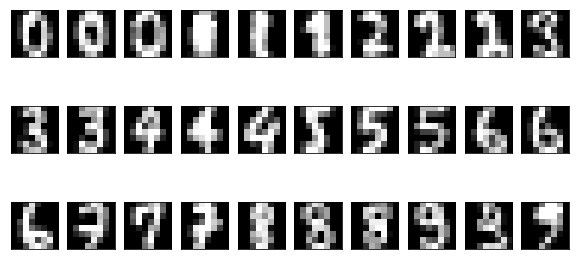

In [34]:
fig = plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(3,10,3*i+1)
    
    #pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r=np.random.randint(curX.shape[0])
    curim = curX[r,:].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    
    plt.subplot(3,10,3*i+2)
    #pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r=np.random.randint(curX.shape[0])
    curim = curX[r,:].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,10,3*i+3)
    #pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r=np.random.randint(curX.shape[0])
    curim = curX[r,:].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])    

Part 2  : Digits dataset using NMF - varying different parameters
--

We will analyse the recnostruction error for the digits dataset and how beta divergence impacts the accuracy

1 - BETA DIVERGENCE



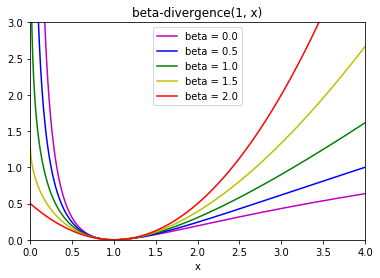

Beta divergence must be minimized, it measures the distance between X and the dot product WH

Values different from ‘frobenius’ (or 2) and ‘kullback-leibler’ (or 1) lead to significantly slower fits

Frobenius refers to beta=2 and Kullback-leibler refers to beta=1


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition.nmf import _beta_divergence

x = np.linspace(0.001, 4, 1000)
y = np.zeros(x.shape)

colors = 'mbgyr'
for j, beta in enumerate((0., 0.5, 1., 1.5, 2.)):
    for i, xi in enumerate(x):
        y[i] = _beta_divergence(1, xi, 1, beta)
    name = "beta = %1.1f" % beta
    plt.plot(x, y, label=name, color=colors[j])

plt.xlabel("x")
plt.title("beta-divergence(1, x)")
plt.legend(loc=0)
plt.axis([0, 4, 0, 3])
plt.show()

print('Beta divergence must be minimized, it measures the distance between X and the dot product WH')
print()
print('Values different from ‘frobenius’ (or 2) and ‘kullback-leibler’ (or 1) lead to significantly slower fits')
print()
print('Frobenius refers to beta=2 and Kullback-leibler refers to beta=1')

2 - RECONSTRUCTION ERROR FOR THE DIGITS DATASET

100%|██████████| 99/99 [02:20<00:00,  3.75s/it]


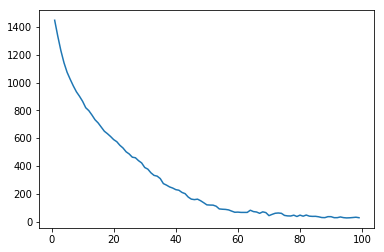

In [9]:
import tqdm
err = []
nclust = range(1,100)
### Generate a NMF model with varying n_components, fit it to the data 
### and add its reconstruction error (Frobenius norm of the matrix difference, 
#or beta-divergence, between the training data X and the reconstructed data WH
#from the fitted model) to the list
for i in tqdm.tqdm(nclust):
    nmf_e = NMF(n_components=i,beta_loss='frobenius',random_state=0)
    nmf_e.fit(x_digits)
    err.append(nmf_e.reconstruction_err_)
plt.plot(nclust,err)

Partie 2 : Sparse Dictionary Learning on Digits
--

We are now going to pass to dictionary learning. The first thing is to generate a model using MiniBatchDictionaryLearning. MiniBatch here means that the method is trained using only a part of the dataset at each time, which helps immensely with the scaling of the method to bigger and wider datasets, but does not guarantee a performance as good as the normal method (where the method see all the dataset at the same time).

Use ncomponents= 16, randomstate= 0 and verbose =  10 to instantiate your object.

The method fit_transform is more useful than fit in this case, as it returns the code generated by the dictionary.

Iteration   0 (elapsed time:   0s,  0.0mn)
Iteration  10 (elapsed time:   0s,  0.0mn)
Iteration  20 (elapsed time:   0s,  0.0mn)
Iteration  30 (elapsed time:   0s,  0.0mn)
Iteration  40 (elapsed time:   0s,  0.0mn)
Iteration  50 (elapsed time:   0s,  0.0mn)
Iteration  60 (elapsed time:   0s,  0.0mn)
Iteration  70 (elapsed time:   0s,  0.0mn)
Iteration  80 (elapsed time:   0s,  0.0mn)
Iteration  90 (elapsed time:   0s,  0.0mn)
Iteration  100 (elapsed time:   0s,  0.0mn)
Iteration  110 (elapsed time:   0s,  0.0mn)
Iteration  120 (elapsed time:   0s,  0.0mn)
Iteration  130 (elapsed time:   0s,  0.0mn)
Iteration  140 (elapsed time:   0s,  0.0mn)
Iteration  150 (elapsed time:   0s,  0.0mn)
Iteration  160 (elapsed time:   0s,  0.0mn)
Iteration  170 (elapsed time:   1s,  0.0mn)
Iteration  180 (elapsed time:   1s,  0.0mn)
Iteration  190 (elapsed time:   1s,  0.0mn)
Iteration  200 (elapsed time:   1s,  0.0mn)
Iteration  210 (elapsed time:   1s,  0.0mn)
Iteration  220 (elapsed time:   1s,  0.0mn

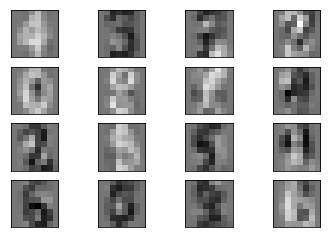

In [40]:
dictlearn= MiniBatchDictionaryLearning(n_components=16,random_state=0,verbose=10)
code = dictlearn.fit_transform(x_digits)
components = dictlearn.components_
fig,axis = plt.subplots(4,4)
for i,d in enumerate(components):
    ax = axis[i//4][i%4]
    ax.imshow(d.reshape((8,8)),cmap=plt.cm.gray,vmin=np.min(components),vmax=np.max(components))
    ax.set_xticks([])
    ax.set_yticks([])

In [41]:
whichex = np.random.randint(low=0,high=100,size=1) 
samples = list()
indexes = list()
for i in range(10):
    index = np.where(y_digits==i)[0][whichex]
    samples.append(x_digits[index])
    indexes.append(index)
X_samp = np.concatenate(samples)
indexes = np.array(indexes)

In [39]:
#reconstruction using the NMF method
reconstructions2 = NMF(code[indexes],components)
reconstructions = np.dot(code[indexes],components)

IndexError: index 772 is out of bounds for axis 0 with size 561

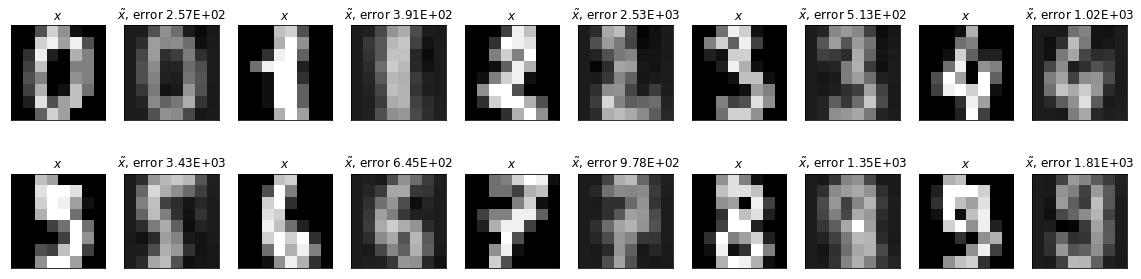

In [42]:
plt.figure(figsize=(20,5))
for plot_index,(digit,reconstruction) in enumerate(zip(X_samp,reconstructions)):
    plt.subplot(2,10,plot_index*2+1)

    plt.imshow(digit.reshape((8,8)),cmap=plt.cm.gray,vmin=x_digits.min(),vmax=x_digits.max())
    plt.xticks([])
    plt.yticks([])
    plt.title('$x$')
        
    plt.subplot(2,10,plot_index*2+2)
    plt.imshow(reconstruction.reshape((8,8)),cmap=plt.cm.gray,vmin=reconstructions.min(),vmax=reconstructions.max())
    plt.xticks([])
    plt.yticks([])
    error = np.sum((reconstruction-digit)**2)
    plt.title('${\~x}$, error %.2E' % error)

In [43]:
#Sparse Dictionary Learning on Digits

#We compare the different errors of reconstruction (original dataset to the newly contructed dataset),
# First : using the Non Negative Matrix Factorization method
# Second : using the basic reconstruction method

print('Reconstruction errors for basic method')
for plot_index,(digit,reconstruction) in enumerate(zip(X_samp,reconstructions)):
    error2 = np.sum((reconstruction-digit)**2)
    print(error2)
    
print()

print('Reconstruction errors for NMF method')
for plot_index,(digit,reconstruction) in enumerate(zip(X_samp,reconstructions)):
    error1 = np.sum((reconstruction-digit)**2)
    print(error1)

Reconstruction errors for basic method
257.13510074188326
391.42905380137
2528.8612840152036
512.7664657144561
1021.7493937033503
3428.540741330856
645.2967526378176
977.5870560595276
1349.6485760178618
1806.0877340520296

Reconstruction errors for NMF method
257.13510074188326
391.42905380137
2528.8612840152036
512.7664657144561
1021.7493937033503
3428.540741330856
645.2967526378176
977.5870560595276
1349.6485760178618
1806.0877340520296


3 - Unsupervised learning on pyrat games using NMF
--

We will now apply NMF to the Pyrat dataset, to better reconstruct unknown games (supervised learning)

In [44]:
x = np.load('dataset.npz')['x']
y = np.load('dataset.npz')['y']

x = x[y<1]
y = y[y<1]

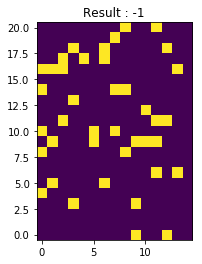

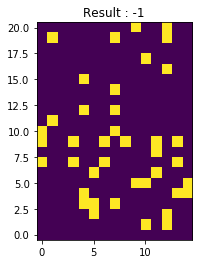

In [45]:
afew = 2
for i in range(afew):
    ind = np.random.randint(x.shape[0])
    plt.imshow(x[ind].reshape((21,15)))
    plt.title('Result : %d' % y[ind])
    plt.gca().invert_yaxis()
    plt.show()

1 - MEAN REPRESENTATION OF LOSS


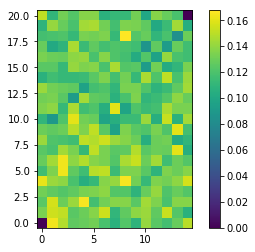

In [46]:
mean_representation = np.mean(x,axis=0)
plt.imshow(mean_representation.reshape((21,15))) #We have to reshape the labyrinth
plt.gca().invert_yaxis() #We have to invert the axis so that our representation is the same as of pyrat.
plt.colorbar()


Reconstructed graph using Kmeans method


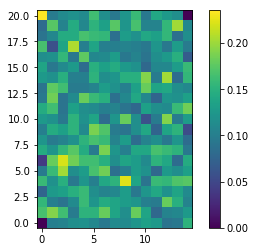

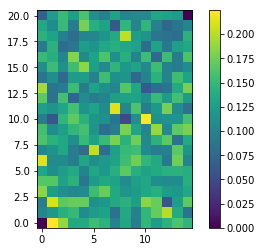

Reconstructed graph using NMF method


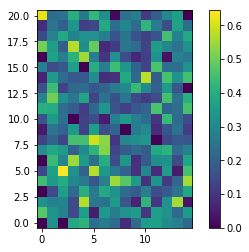

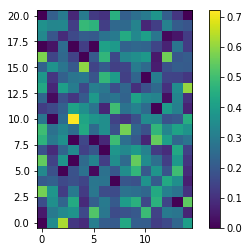

In [47]:
#Recontruction of the dataset with the mean representation of the games the python didn't win


# Frist two maps use the Kmeans method

kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(x)
print()
print('Reconstructed graph using Kmeans method')
for curclust in kmeans.cluster_centers_:
    plt.imshow(curclust.reshape((21,15)))
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()

    
# Last two maps use the NMF method -- far better accuracy

nmf = NMF(n_components=2,init='random', random_state=0)
nmf.fit_transform(x)
print('Reconstructed graph using NMF method')

for mat in nmf.components_:
    plt.imshow(mat.reshape((21,15)))
    plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()

Kmeans Method : Reconstruction error was 5.89 and 5.90

NMF Method : Reconstruction error is 0.119 and 0.204



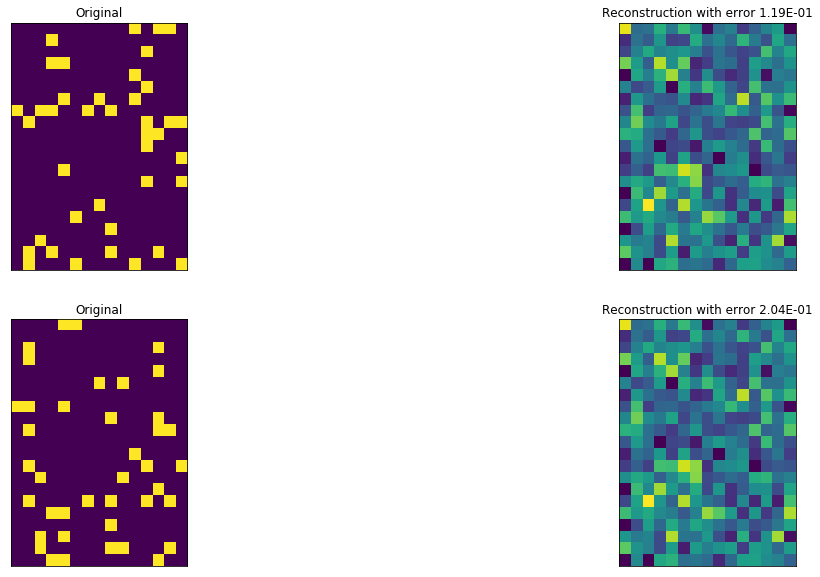

In [48]:
### Few random examples and Reconstruction of the dataset using NMF, with the associated error

whichex = np.random.randint(low=0,high=20,size=1) 
X_samp = np.concatenate([x[y==i][whichex] for i in range(-1,1)])


nmf = NMF(n_components=2,init=None, beta_loss='frobenius', random_state=0)
X_Quant = nmf.fit_transform(x)

labels = np.argmin(X_Quant,axis=1)
X_errors = X_Quant

nmf = nmf.components_[X_errors.argmin(axis=1)]  #Array containing the closest centroid (argmin of error) to the samples
best_errors = X_errors.min(axis=1) #Array containing the minimal error for each sample

plt.figure(figsize=(20,10))
for i,(im,im_cen,error) in enumerate(zip(X_samp,nmf,best_errors)):
        
    plt.subplot(2,2,1+2*i)
    plt.imshow(im.reshape(21,15))
    plt.gca().invert_yaxis()
    plt.xticks([])
    plt.yticks([])
    plt.title("Original")
    
    plt.subplot(2,2,2+2*i)
    plt.imshow(im_cen.reshape(21,15))
    plt.gca().invert_yaxis()
    plt.xticks([])
    plt.yticks([])
    plt.title("Reconstruction with error %.2E"%error)


print('Kmeans Method : Reconstruction error was 5.89 and 5.90')
print()
print('NMF Method : Reconstruction error is 0.119 and 0.204')
print()



100%|██████████| 99/99 [01:15<00:00,  1.89s/it]


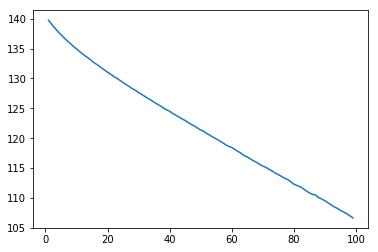

In [49]:
error = []
reconst = []
nclust = range(1,100)
for i in tqdm.tqdm(nclust):
    nmf_e = NMF(n_components=i,random_state=0)
    E = nmf_e.fit_transform(x)
    reconst.append(nmf_e.reconstruction_err_)
plt.plot(nclust,np.array(reconst))

Dictionary Learning on PyRat Games 
--

Generate a MiniBatchDictionaryLearning model of the pyrat dataset. Show the components, the reconstructions and the errors.

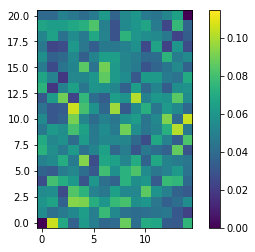

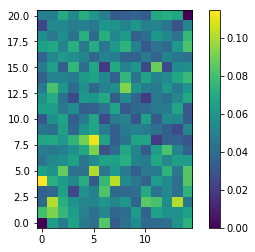

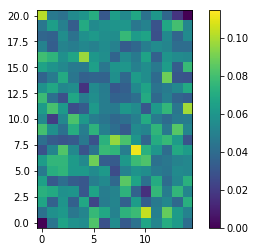

In [50]:
dictl = MiniBatchDictionaryLearning(n_components=3,random_state=0)

code = dictl.fit_transform(x)

for curclust in dictl.components_:
    plt.imshow(curclust.reshape((21,15)),vmin=dictl.components_.min(),vmax=dictl.components_.max())
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

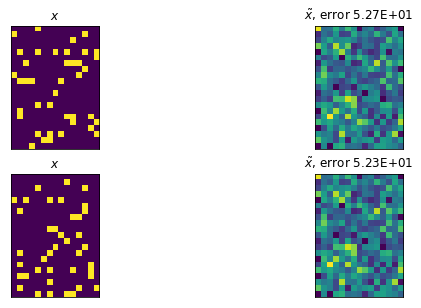

In [52]:
whichex = np.random.randint(low=0,high=20,size=1) 
samples = list()
indexes = list()
for i in range(-1,1):
    index = np.where(y==i)[0][whichex]
    samples.append(x[index])
    indexes.append(index)
x_samples = np.concatenate(samples)
indexes = np.array(indexes)

#Ici on peut faire la correspondance avec l'idée d'avant 
X_Quant = code
labels = dictl.components_

nmf = NMF(n_components=2,init=None, random_state=0)

X_errors = nmf.fit_transform(x)

best_errors = X_errors.min(axis=1) #Array containing the minimal error for each sample
nmf = nmf.components_[X_errors.argmin(axis=1)] #Array containing the closest centroid (argmin of error) to the samples


plt.figure(figsize=(10,5))
for i,(original,reconstruction) in enumerate(zip(x_samples,nmf)):
    
    plt.subplot(2,2,i*2+1)

    plt.imshow(original.reshape((21,15)),vmin=x.min(),vmax=x.max())
    plt.gca().invert_yaxis()
    plt.xticks([])
    plt.yticks([])
    plt.title('$x$')
    
    plt.subplot(2,2,i*2+2)
    plt.imshow(reconstruction.reshape((21,15)),vmin=nmf.min(),vmax=nmf.max())
    plt.gca().invert_yaxis()
    plt.xticks([])
    plt.yticks([])
    error = np.sum((reconstruction-original)**2)
    plt.title('${\~x}$, error %.2E' % error)